In [1]:
import pandas as pd
import os
from sodapy import Socrata
import matplotlib.pyplot as plt
import numpy as np

cvs_output_file_path =  os.path.join("cvs_output.csv")

# Unauthenticated client only works with public data sets. Note 'None'
# in place of application token, and no username or password:
client = Socrata("data.cdc.gov", None)

# Example authenticated client (needed for non-public datasets):
# client = Socrata(data.cdc.gov,
#                  MyAppToken,
#                  userame="user@example.com",
#                  password="AFakePassword")

# First 2000 results, returned as JSON from API / converted to Python list of
# dictionaries by sodapy.
results = client.get("8pt5-q6wp", limit=2000)

# Convert to pandas DataFrame
results_df = pd.DataFrame.from_records(results)
results_df

,indicator,group,state,subgroup,week,week_label,value,lowci,highci,confidence_interval,quartile_range
0,Symptoms of Depressive Disorder,National Estimate,United States,United States,1,Apr 23 - May 5,23.5,22.7,24.3,22.7 - 24.3,NaN
1,Symptoms of Depressive Disorder,By Age,United States,18 - 29 years,1,Apr 23 - May 5,32.7,30.2,35.2,30.2 - 35.2,NaN
2,Symptoms of Depressive Disorder,By Age,United States,30 - 39 years,1,Apr 23 - May 5,25.7,24.1,27.3,24.1 - 27.3,NaN
3,Symptoms of Depressive Disorder,By Age,United States,40 - 49 years,1,Apr 23 - May 5,24.8,23.3,26.2,23.3 - 26.2,NaN
4,Symptoms of Depressive Disorder,By Age,United States,50 - 59 years,1,Apr 23 - May 5,23.2,21.5,25,21.5 - 25.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
1995,Symptoms of Anxiety Disorder,By State,Kansas,Kansas,10,July 2 - July 7,32.3,28.2,36.6,28.2 - 36.6,31.4-32.9
1996,Symptoms of Anxiety Disorder,By State,Kentucky,Kentucky,10,July 2 - July 7,36.3,31.2,41.6,31.2 - 41.6,35.4-40.6
1997,Symptoms of Anxiety Disorder,By State,Louisiana,Louisiana,10,July 2 - July 7,38.6,34.2,43.1,34.2 - 43.1,35.4-40.6
1998,Symptoms of Anxiety Disorder,By State,Maine,Maine,10,July 2 - July 7,32.8,29,36.7,29.0 - 36.7,31.4-32.9


In [2]:
us_by_age_df = results_df.loc[(results_df["state"] == "United States") &
                              (results_df["group"] == "By Age")]
    
us_by_age_trim_df = us_by_age_df[['indicator', 'subgroup', 'week', 'value']].copy()
us_by_age_trim_df['value'] = us_by_age_df['value'].astype(float)
us_by_age_trim_df['week'] = us_by_age_df['week'].astype(int)
us_by_age_trim_df = us_by_age_trim_df.loc[((us_by_age_trim_df['subgroup'] == "18 - 29 years") |
                                           (us_by_age_trim_df['subgroup'] == "30 - 39 years"))]
pd.set_option('display.max_rows', 500)
us_by_age_trim_df

,indicator,subgroup,week,value
1,Symptoms of Depressive Disorder,18 - 29 years,1,32.7
2,Symptoms of Depressive Disorder,30 - 39 years,1,25.7
71,Symptoms of Anxiety Disorder,18 - 29 years,1,40.2
72,Symptoms of Anxiety Disorder,30 - 39 years,1,34.4
141,Symptoms of Anxiety Disorder or Depressive Dis...,18 - 29 years,1,46.8
142,Symptoms of Anxiety Disorder or Depressive Dis...,30 - 39 years,1,39.6
211,Symptoms of Depressive Disorder,18 - 29 years,2,36.2
212,Symptoms of Depressive Disorder,30 - 39 years,2,27.7
281,Symptoms of Anxiety Disorder,18 - 29 years,2,42.0
282,Symptoms of Anxiety Disorder,30 - 39 years,2,34.3


In [3]:
us_by_age_group = us_by_age_trim_df.groupby(["indicator", "week"])
us_by_age_mean_df = pd.DataFrame(us_by_age_group["value"].mean())
us_by_age_mean_df.reset_index(inplace = True) 
subgroup_col = []
for i in range(len(us_by_age_mean_df)):
    subgroup_col.append("average")
us_by_age_mean_df['subgroup'] = subgroup_col  
us_by_age_mean_df = us_by_age_mean_df[['indicator','subgroup','week','value']]
us_by_age_mean_df

,indicator,subgroup,week,value
0,Symptoms of Anxiety Disorder,average,1,37.30
1,Symptoms of Anxiety Disorder,average,2,38.15
2,Symptoms of Anxiety Disorder,average,3,35.40
3,Symptoms of Anxiety Disorder,average,4,37.15
4,Symptoms of Anxiety Disorder,average,5,39.00
5,Symptoms of Anxiety Disorder,average,6,39.25
6,Symptoms of Anxiety Disorder,average,7,39.35
7,Symptoms of Anxiety Disorder,average,8,39.40
8,Symptoms of Anxiety Disorder,average,9,40.65
9,Symptoms of Anxiety Disorder,average,10,42.50


In [4]:
for i in range(len(us_by_age_mean_df)):
    us_by_age_trim_df = us_by_age_trim_df.append(us_by_age_mean_df.iloc[i])
us_by_age_trim_df.reset_index(inplace=True)    
us_by_age_trim_df

,index,indicator,subgroup,week,value
0,1,Symptoms of Depressive Disorder,18 - 29 years,1,32.70
1,2,Symptoms of Depressive Disorder,30 - 39 years,1,25.70
2,71,Symptoms of Anxiety Disorder,18 - 29 years,1,40.20
3,72,Symptoms of Anxiety Disorder,30 - 39 years,1,34.40
4,141,Symptoms of Anxiety Disorder or Depressive Dis...,18 - 29 years,1,46.80
5,142,Symptoms of Anxiety Disorder or Depressive Dis...,30 - 39 years,1,39.60
6,211,Symptoms of Depressive Disorder,18 - 29 years,2,36.20
7,212,Symptoms of Depressive Disorder,30 - 39 years,2,27.70
8,281,Symptoms of Anxiety Disorder,18 - 29 years,2,42.00
9,282,Symptoms of Anxiety Disorder,30 - 39 years,2,34.30


In [5]:
us_by_age_dep_df = us_by_age_trim_df.loc[(us_by_age_trim_df["indicator"] == "Symptoms of Depressive Disorder")]
us_by_age_dep_df

,index,indicator,subgroup,week,value
0,1,Symptoms of Depressive Disorder,18 - 29 years,1,32.70
1,2,Symptoms of Depressive Disorder,30 - 39 years,1,25.70
6,211,Symptoms of Depressive Disorder,18 - 29 years,2,36.20
7,212,Symptoms of Depressive Disorder,30 - 39 years,2,27.70
12,421,Symptoms of Depressive Disorder,18 - 29 years,3,36.70
13,422,Symptoms of Depressive Disorder,30 - 39 years,3,26.70
18,631,Symptoms of Depressive Disorder,18 - 29 years,4,36.70
19,632,Symptoms of Depressive Disorder,30 - 39 years,4,27.40
24,841,Symptoms of Depressive Disorder,18 - 29 years,5,36.80
25,842,Symptoms of Depressive Disorder,30 - 39 years,5,27.90


In [6]:
us_by_age_anx_df = us_by_age_trim_df.loc[(us_by_age_trim_df["indicator"] == "Symptoms of Anxiety Disorder")]
us_by_age_anx_df

,index,indicator,subgroup,week,value
2,71,Symptoms of Anxiety Disorder,18 - 29 years,1,40.20
3,72,Symptoms of Anxiety Disorder,30 - 39 years,1,34.40
8,281,Symptoms of Anxiety Disorder,18 - 29 years,2,42.00
9,282,Symptoms of Anxiety Disorder,30 - 39 years,2,34.30
14,491,Symptoms of Anxiety Disorder,18 - 29 years,3,38.60
15,492,Symptoms of Anxiety Disorder,30 - 39 years,3,32.20
20,701,Symptoms of Anxiety Disorder,18 - 29 years,4,39.10
21,702,Symptoms of Anxiety Disorder,30 - 39 years,4,35.20
26,911,Symptoms of Anxiety Disorder,18 - 29 years,5,42.20
27,912,Symptoms of Anxiety Disorder,30 - 39 years,5,35.80


In [7]:
us_by_age_anx_or_dep_df = us_by_age_trim_df.loc[(us_by_age_trim_df["indicator"] == 
                                                 "Symptoms of Anxiety Disorder or Depressive Disorder")]
us_by_age_anx_or_dep_df = us_by_age_anx_or_dep_df.sort_values(["subgroup", "week"], ascending = True)
us_by_age_anx_or_dep_df

,index,indicator,subgroup,week,value
4,141,Symptoms of Anxiety Disorder or Depressive Dis...,18 - 29 years,1,46.80
10,351,Symptoms of Anxiety Disorder or Depressive Dis...,18 - 29 years,2,47.40
16,561,Symptoms of Anxiety Disorder or Depressive Dis...,18 - 29 years,3,47.70
22,771,Symptoms of Anxiety Disorder or Depressive Dis...,18 - 29 years,4,46.60
28,981,Symptoms of Anxiety Disorder or Depressive Dis...,18 - 29 years,5,49.30
34,1191,Symptoms of Anxiety Disorder or Depressive Dis...,18 - 29 years,6,49.30
40,1401,Symptoms of Anxiety Disorder or Depressive Dis...,18 - 29 years,7,48.70
46,1611,Symptoms of Anxiety Disorder or Depressive Dis...,18 - 29 years,8,50.00
52,1821,Symptoms of Anxiety Disorder or Depressive Dis...,18 - 29 years,9,49.40
5,142,Symptoms of Anxiety Disorder or Depressive Dis...,30 - 39 years,1,39.60


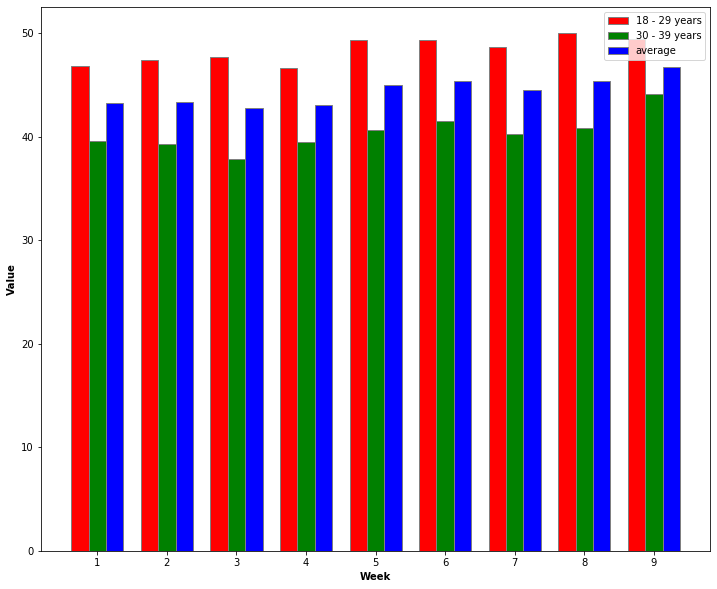

In [8]:
# set width of bar 
barWidth = 0.25
fig = plt.subplots(figsize =(12, 10)) 

# set height of bar 
age_18_29_df = us_by_age_anx_or_dep_df.loc[(us_by_age_anx_or_dep_df["subgroup"] == "18 - 29 years")]
age_18_29 = age_18_29_df['value'].to_list()
weeks_list = age_18_29_df['week'].to_list()
# print(age_18_29)

age_30_39_df = us_by_age_anx_or_dep_df.loc[(us_by_age_anx_or_dep_df["subgroup"] == "30 - 39 years")]
age_30_39 = age_30_39_df['value'].to_list()
# print(age_30_39)

age_avg_df = us_by_age_anx_or_dep_df.loc[(us_by_age_anx_or_dep_df["subgroup"] == "average")]
age_avg = age_avg_df['value'].to_list()
# print(age_avg)
   
# # Set position of bar on X axis 
br1 = np.arange(len(weeks_list)) 
br2 = [x + barWidth for x in br1] 
br3 = [x + barWidth for x in br2] 
   
# # Make the plot 
plt.bar(br1, age_18_29, color ='r', width = barWidth, 
        edgecolor ='grey', label ='18 - 29 years') 
plt.bar(br2, age_30_39, color ='g', width = barWidth, 
        edgecolor ='grey', label ='30 - 39 years') 
plt.bar(br3, age_avg, color ='b', width = barWidth, 
        edgecolor ='grey', label ='average') 
   
# # Adding Xticks  
plt.xlabel('Week', fontweight ='bold') 
plt.ylabel('Value', fontweight ='bold') 
plt.xticks([r + barWidth for r in range(len(age_18_29))], weeks_list)
plt.legend()
   
plt.show()